In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16
nx = 41
L = 2.0
dx = L/(nx-1)
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu
nt = 20
x= numpy.linspace(0.0,L,num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x>=0.5,x<=1.0))
u0[mask]=2.0

In [4]:
u=u0.copy()
for n in range(nt):
    u[1:-1]=u[1:-1]+nu*dt/dx**2 * (u[2:]-2*u[1:-1]+u[:-2])

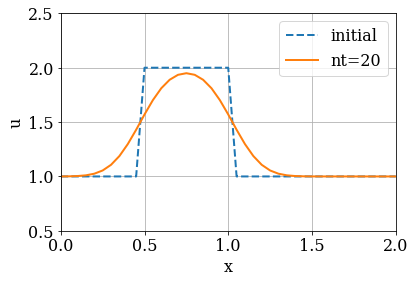

In [8]:
pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0,label='initial',
           color='C0',linestyle='--',linewidth=2)
pyplot.plot(x,u,label='nt={}'.format(nt),
           color='C1',linestyle='-',linewidth=2)
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [17]:
def diffusion(u0,sigma=0.5,nt=20):
    u_hist = [u0.copy()]
    u=u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist
u1 = [u0.copy()]
u1

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.])]

FileNotFoundError: [Errno 2] No such file or directory: '../../styles/numericalmoocstyle.css'

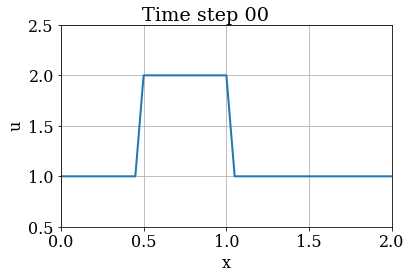

In [18]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()
def update_plot(n, u_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=100)
HTML(anim.to_html5_video())
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

In [19]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [20]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
sympy.init_printing()

In [23]:
x=sympy.symbols('x')

In [25]:
x,nu,t = sympy.symbols('x nu t')

In [28]:
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1))))+sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))

In [30]:
phiprime = phi.diff(x)

In [31]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4
